In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ucimlrepo import fetch_ucirepo 
chess_king_rook_vs_king = fetch_ucirepo(id=23) 
df = pd.concat([chess_king_rook_vs_king.data.features, chess_king_rook_vs_king.data.targets], axis=1)

In [3]:
mapping = {
    "draw":-1,
    "zero":0,
    "one":1,
    "two":2,
    "three":3,
    "four":4,
    "five":5,
    "six":6,
    "seven":7,
    "eight":8,
    "nine":9,
    "ten":10,
    "eleven":11,
    "twelve":12,
    "thirteen":13,
    "fourteen":14,
    "fifteen":15,
    "sixteen":16
}
df["white-depth-of-win"]= df["white-depth-of-win"].map(mapping)

In [4]:
mapping_file={
    "a":1,
    "b":2,
    "c":3,
    "d":4,
    "e":5,
    "f":6,
    "g":7,
    "h":8
}
df["white-king-file"] = df["white-king-file"].map(mapping_file)
df["white-rook-file"] = df["white-rook-file"].map(mapping_file)
df["black-king-file"] = df["black-king-file"].map(mapping_file)

In [5]:
df["dist_eukl"]= np.sqrt((df['white-king-file']-df['black-king-file'])**2+(df['white-king-rank']-df["black-king-rank"])**2)
df["dist_manh"]=np.abs(df['white-king-file']-df['black-king-file'])+np.abs(df['white-king-rank']-df["black-king-rank"])
df["dist_czeb"]=np.maximum(np.abs(df['white-king-file']-df['black-king-file']),np.abs(df['white-king-rank']-df["black-king-rank"]))

In [6]:
df['dist_edge']=df[['black-king-file',"black-king-rank"]].apply(lambda x: min(x[0]-1, 8-x[0], x[1]-1, 8-x[1]), axis=1)

C:\Users\Michał\AppData\Local\Temp\ipykernel_38876\942894275.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['dist_edge']=df[['black-king-file',"black-king-rank"]].apply(lambda x: min(x[0]-1, 8-x[0], x[1]-1, 8-x[1]), axis=1)


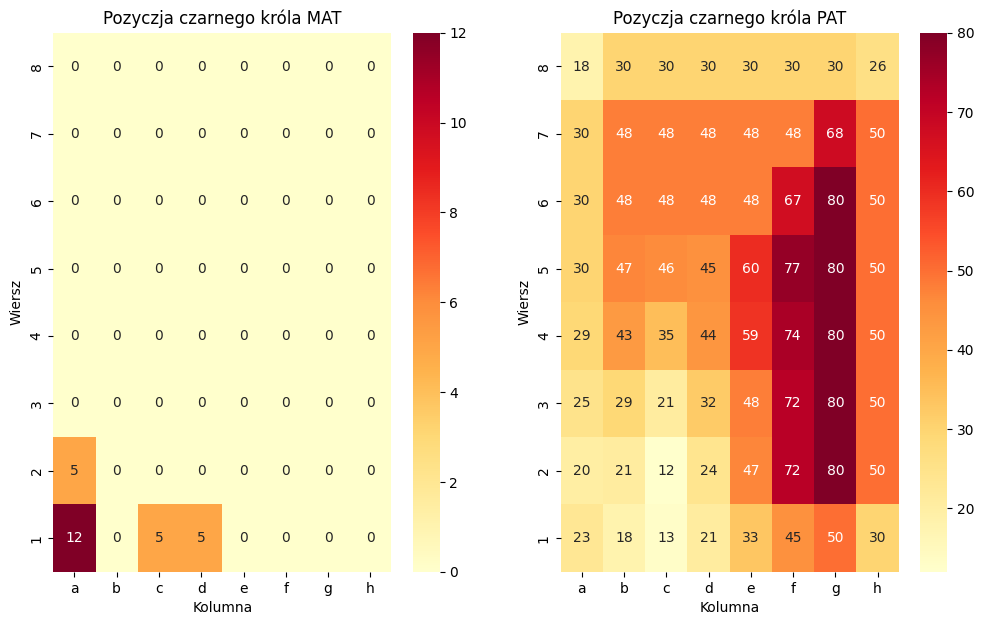

In [7]:
#Pytanie 1
mat = df[df["white-depth-of-win"]==0].loc[:,["black-king-file","black-king-rank"]]
mat=pd.crosstab(mat["black-king-rank"],mat["black-king-file"]).reindex(index=range(1,9),columns=range(1,9),fill_value=0).sort_index(ascending=False)
pat=df[df["white-depth-of-win"]==-1].loc[:,["black-king-file","black-king-rank"]]
pat=pd.crosstab(pat["black-king-rank"],pat["black-king-file"]).reindex(index=range(1,9),columns=range(1,9),fill_value=0).sort_index(ascending=False)

plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
sns.heatmap(mat, annot=True, fmt=".0f", cmap="YlOrRd",
            xticklabels=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'],
            yticklabels=['8', '7', '6', '5', '4', '3', '2', '1'])
plt.xlabel('Kolumna')                     
plt.ylabel('Wiersz')
plt.title("Pozyczja czarnego króla MAT")


plt.subplot(1, 2, 2)
sns.heatmap(pat,annot=True, fmt=".0f", cmap="YlOrRd",xticklabels=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'],
            yticklabels=['8', '7', '6', '5', '4', '3', '2', '1'])
plt.xlabel('Kolumna')                     
plt.ylabel('Wiersz')
plt.title("Pozyczja czarnego króla PAT")

plt.show()

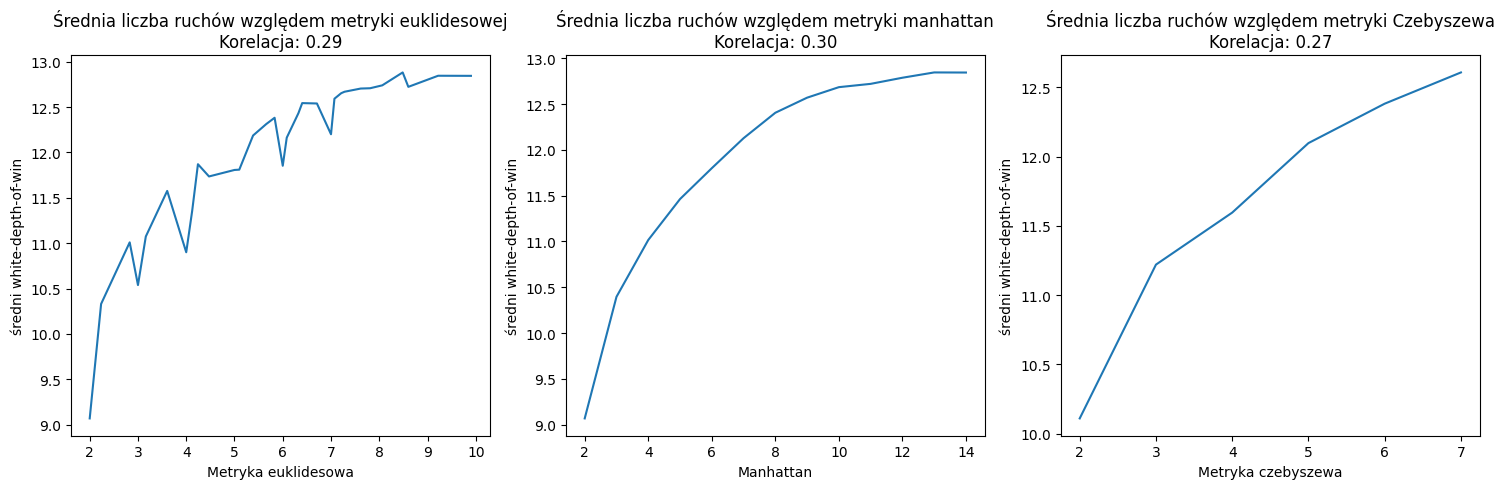

In [8]:
#Pytanie 2
df_2=df[df["white-depth-of-win"] != -1].copy()
avg_euclides=df_2.groupby("dist_eukl")["white-depth-of-win"].mean()
avg_manhattan=df_2.groupby("dist_manh")["white-depth-of-win"].mean()
avg_czebyszew=df_2.groupby("dist_czeb")["white-depth-of-win"].mean()

corr_eukl=df_2['dist_eukl'].corr(df_2['white-depth-of-win'])
corr_manh=df_2['dist_manh'].corr(df_2['white-depth-of-win'])
corr_czeb=df_2['dist_czeb'].corr(df_2['white-depth-of-win'])

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(avg_euclides.index, avg_euclides.values)
plt.title(f"Średnia liczba ruchów względem metryki euklidesowej\nKorelacja: {corr_eukl:.2f}")
plt.xlabel("Metryka euklidesowa")
plt.ylabel("średni white-depth-of-win")

plt.subplot(1,3,2)
plt.plot(avg_manhattan.index, avg_manhattan.values)
plt.title(f"Średnia liczba ruchów względem metryki manhattan\nKorelacja: {corr_manh:.2f}")
plt.xlabel("Manhattan")
plt.ylabel("średni white-depth-of-win")

plt.subplot(1,3,3)
plt.plot(avg_czebyszew.index, avg_czebyszew.values)
plt.title(f"Średnia liczba ruchów względem metryki Czebyszewa\nKorelacja: {corr_czeb:.2f}")
plt.xlabel("Metryka czebyszewa")
plt.ylabel("średni white-depth-of-win")

plt.tight_layout()
plt.show()

#Najblizszą 1 korelacje ma metryka manhattan, dlatego jest najlepsza do szacowania liczby ruchów.

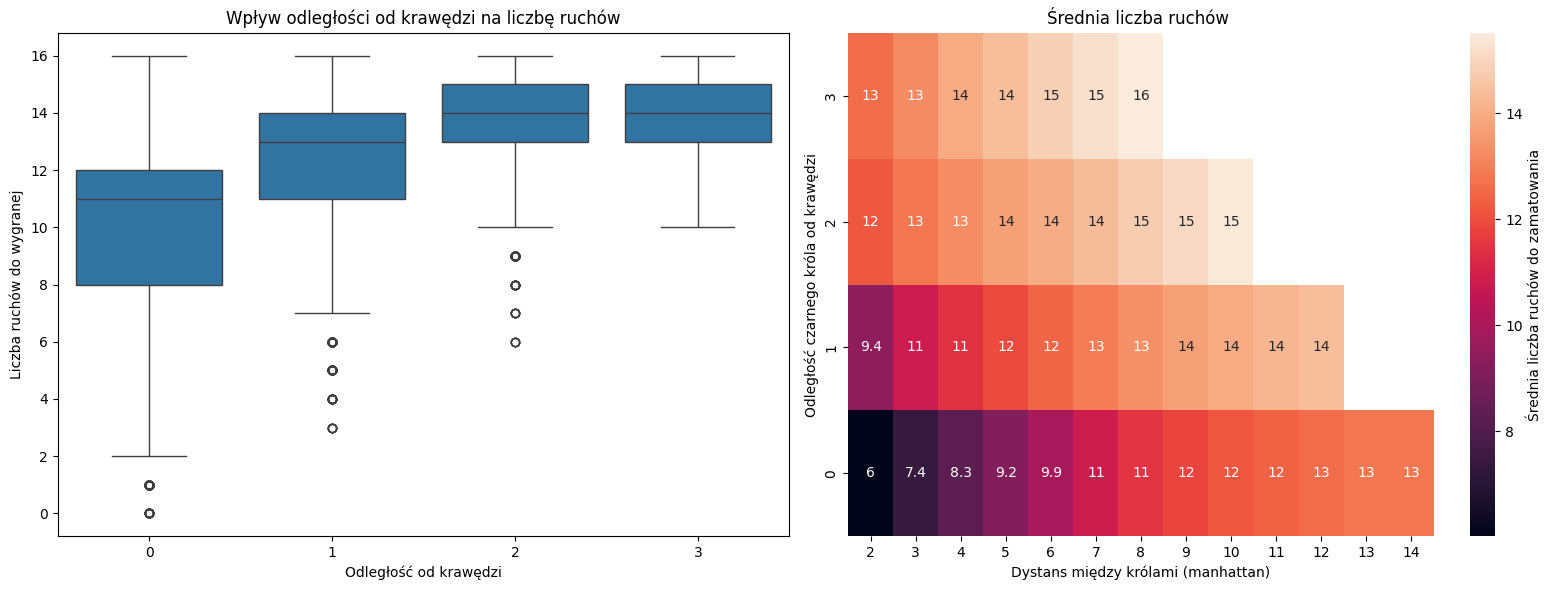

In [9]:
df_3=df[df["white-depth-of-win"] != -1].copy()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))


sns.boxplot(x='dist_edge', y='white-depth-of-win', data=df_3, ax=ax1)
ax1.set_title('Wpływ odległości od krawędzi na liczbę ruchów')
ax1.set_xlabel('Odległość od krawędzi')
ax1.set_ylabel('Liczba ruchów do wygranej')


pivot_table = df_3.pivot_table(values='white-depth-of-win', index='dist_edge', columns='dist_manh', aggfunc='mean')

sns.heatmap(pivot_table, annot=True,ax=ax2,cbar_kws={'label': 'Średnia liczba ruchów do zamatowania'})
ax2.set_title('Średnia liczba ruchów ')
ax2.set_xlabel('Dystans między królami (manhattan)')
ax2.set_ylabel('Odległość czarnego króla od krawędzi')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

#Z lewego wykresy można wywnioskować, że im bliżej krawędzi znajduje się czarny król tym średnio mniej ruchów należy wykonać do mata.
#Z prawego wykresu widać, że uwzględnienie dystansu pomiędzy królami pozwala jeszcze dokładniej oszacować średnią liczbę ruchów do mata,
#im bliżej siebie są króle, tym średnio mniej ruchów potrzeba.